In [1]:
# Paso 1: Cargar las librerías necesarias

import torch
from PIL import Image
from transformers import AutoModel, AutoTokenizer, AutoModelForCausalLM
from transformers import BitsAndBytesConfig

c:\Users\yera_\Documents\Areas\En proceso\Qualentum-Proyectos\ProspectAI\ProspectAI\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Determinar el dispositivo a usar (CPU o GPU)
device = "cuda" if torch.cuda.is_available() else "cpu"
# device = "cpu"
print(f"Usando dispositivo: {device}")

Usando dispositivo: cuda


In [5]:
img_path = "../prospectos/train/alprazolan/alprazolan.JPG"
# Abre la imagen directamente desde la ruta
image = Image.open(img_path)
prompt = 'Examina el prospecto médico de la imagen y enumera los detalles más importantes relacionados con: - Qué es el medicamento. - Para qué se utiliza el medicamento. - Precauciones antes de tomarlo. - Forma de tomarlo. - Efectos adversos del fármaco. - Conservación del fármaco. - Información adicional.'

## Intento 1 (qresearch/llama-3.1-8B-vision-378)(CUDA out of memory)

In [3]:
# Paso 2: Inicializar el pipeline de LLM
# qresearch/llama-3.1-8B-vision-378
# openbmb/MiniCPM-Llama3-V-2_5

# Paso 2: Inicializar el pipeline de LLM

model = AutoModelForCausalLM.from_pretrained('qresearch/llama-3.1-8B-vision-378', trust_remote_code=True)
model = model.to(device=device)


Loading checkpoint shards: 100%|██████████| 4/4 [01:12<00:00, 18.14s/it]


OutOfMemoryError: CUDA out of memory. Tried to allocate 224.00 MiB. GPU 0 has a total capacity of 4.00 GiB of which 0 bytes is free. Of the allocated memory 18.33 GiB is allocated by PyTorch, and 245.05 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [1]:
# Paso 3: Cargar la imagen desde el dataset
image_path = '../prospectos/train/hidroferol/hidroferol.JPG'  
image = Image.open(image_path)

NameError: name 'Image' is not defined

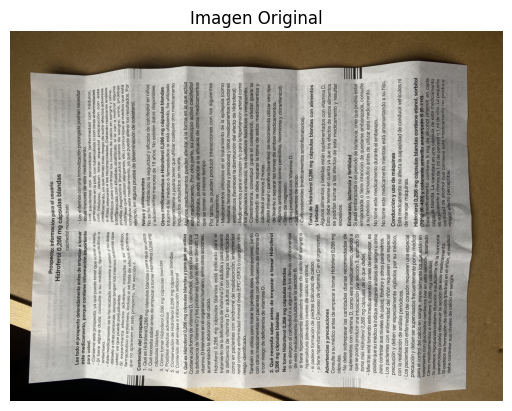

In [62]:
# Mostrar la imagen (opcional)
plt.imshow(image)
plt.axis('off')  # No mostrar los ejes
plt.title("Imagen Original")
plt.show()

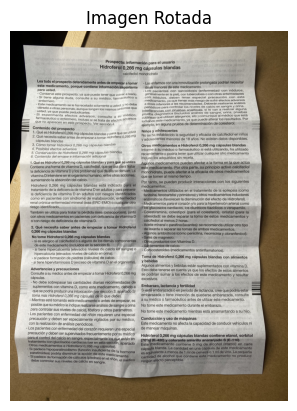

In [65]:
from PIL import Image

# Rotar la imagen (por ejemplo, 45 grados)
rotated_image = image.rotate(-90, expand=True)

# Mostrar la imagen rotada
plt.imshow(rotated_image)
plt.axis('off')  # No mostrar los ejes
plt.title("Imagen Rotada")
plt.show()

# Guardar la imagen rotada si lo deseas
rotated_image.save("../prospectos/hidroferol/imagen1_rotada.jpg")  # Reemplaza con la ruta donde deseas guardar la imagen rotada

In [68]:
# Paso 4: Usar el pipeline para extraer el texto
results = pipe(rotated_image)

c:\Users\yera_\Documents\Areas\En proceso\Qualentum-Proyectos\ProspectAI\ProspectAI\.venv\Lib\site-packages\transformers\generation\utils.py:1387: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 20 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [69]:
# Paso 5: Mostrar el texto extraído
print("Texto extraído:")
print(results[0]['generated_text'])  # Dependiendo del modelo, puede que necesites ajustar esto

Texto extraído:
<s_cord-v2><s_menu><s_nm> N-O</s_nm><s_price> N-O</s_price><sep/><s_nm> SOPHOCOLOGIC


## Intento 2 (No aporta respuestas significativas el modelo)

In [1]:
import torch
from transformers import (
    AutoModelForCausalLM, 
    AutoTokenizer)
from PIL import Image
import requests
from io import BytesIO

c:\Users\yera_\Documents\Areas\En proceso\Qualentum-Proyectos\ProspectAI\ProspectAI\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
img_path = "../prospectos/test/hidroferol/IMG_5042.JPG"
# Abre la imagen directamente desde la ruta
image = Image.open(img_path)


In [5]:
try:
    model = AutoModelForCausalLM.from_pretrained(
        "qresearch/llama-3.1-8B-vision-378",
        trust_remote_code=True,
        torch_dtype=torch.float16,
    ).to("cuda")
except ModuleNotFoundError as e:
    print(f"Error al cargar el modelo: {e}")
except Exception as e:
    print(f"Otro error ocurrió: {e}")


Loading checkpoint shards: 100%|██████████| 4/4 [00:35<00:00,  8.78s/it]


In [6]:
tokenizer = AutoTokenizer.from_pretrained("qresearch/llama-3.1-8B-vision-378", use_fast=True,)


In [7]:
# Paso 3: Cargar la imagen desde el dataset
image_path = '../prospectos/test/hidroferol/IMG_5042.JPG'  
image = Image.open(image_path)

In [8]:
print(
    model.answer_question(
        image, "Examina el prospecto médico de la imagen y enumera los detalles más importantes relacionados con: - Qué es el medicamento. - Para qué se utiliza el medicamento. - Precauciones antes de tomarlo. - Forma de tomarlo. - Efectos adversos del fármaco. - Conservación del fármaco. - Información adicional.", tokenizer, max_new_tokens=128, do_sample=True, temperature=0.1
    ),
)

c:\Users\yera_\Documents\Areas\En proceso\Qualentum-Proyectos\ProspectAI\ProspectAI\.venv\Lib\site-packages\transformers\models\siglip\modeling_siglip.py:573: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


Lo siento, pero no puedo examinar imágenes ni prospectos médicos. ¿Hay algo más en lo que pueda ayudarte?


## Intento 2.5 (openbmb/MiniCPM-Llama3-V-2_5)(Buena respuesta pero 7 mins)

In [3]:
from transformers import AutoModel
model = AutoModel.from_pretrained('openbmb/MiniCPM-Llama3-V-2_5', trust_remote_code=True, torch_dtype=torch.float16)
model = model.to(device='cuda')

Loading checkpoint shards: 100%|██████████| 7/7 [00:01<00:00,  4.38it/s]


In [4]:
tokenizer = AutoTokenizer.from_pretrained('openbmb/MiniCPM-Llama3-V-2_5', trust_remote_code=True)
model.eval()

MiniCPMV(
  (llm): LlamaForCausalLM(
    (model): LlamaModel(
      (embed_tokens): Embedding(128256, 4096)
      (layers): ModuleList(
        (0-31): 32 x LlamaDecoderLayer(
          (self_attn): LlamaSdpaAttention(
            (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
            (k_proj): Linear(in_features=4096, out_features=1024, bias=False)
            (v_proj): Linear(in_features=4096, out_features=1024, bias=False)
            (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
            (rotary_emb): LlamaRotaryEmbedding()
          )
          (mlp): LlamaMLP(
            (gate_proj): Linear(in_features=4096, out_features=14336, bias=False)
            (up_proj): Linear(in_features=4096, out_features=14336, bias=False)
            (down_proj): Linear(in_features=14336, out_features=4096, bias=False)
            (act_fn): SiLU()
          )
          (input_layernorm): LlamaRMSNorm()
          (post_attention_layernorm): LlamaRMSNorm()

In [7]:
img_path = "../prospectos/train/alprazolan/alprazolan.JPG"
# Abre la imagen directamente desde la ruta
image = Image.open(img_path)
question = 'Examina el prospecto médico de la imagen y enumera los detalles más importantes relacionados con: - Qué es el medicamento. - Para qué se utiliza el medicamento. - Precauciones antes de tomarlo. - Forma de tomarlo. - Efectos adversos del fármaco. - Conservación del fármaco. - Información adicional.'
msgs = [{'role': 'user', 'content': question}]

In [8]:
res = model.chat(
    image=image,
    msgs=msgs,
    tokenizer=tokenizer,
    sampling=True, # if sampling=False, beam_search will be used by default
    temperature=0.1,
    # system_prompt='' # pass system_prompt if needed
)
print(res)

El prospecto médico en la imagen proporciona información detallada sobre el medicamento Alprazolam, que es un fármaco perteneciente a la familia de los benzodiazepínicos. El medicamento se utiliza comúnmente para tratar síntomas de ansiedad y estrés. Antes de tomar este medicamento, es importante leer las precauciones, ya que puede interactuar con otros medicamentos o ser contraindicado para ciertas condiciones médicas.

La forma de tomarlo suele ser oral, según se indica en el prospecto. Los efectos adversos potenciales incluyen somnolencia, mareo, debilidad muscular y problemas de coordinación. Es fundamental conservar el medicamento en un lugar seguro y fuera del alcance de niños.

Además, el prospecto contiene información adicional sobre la dosis recomendada, posibles interacciones con otros medicamentos y consejos para el paciente. Sin embargo, debido al ángulo y la resolución de la imagen, no todos los detalles específicos están claramente visibles. Para obtener una comprensión c

## Intento 3 (vikhyatk/moondream2) (Texto muy pequeño)

In [3]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from PIL import Image

In [4]:
model_id = "vikhyatk/moondream2"
revision = "2024-07-23"


In [7]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from PIL import Image
# Variables del modelo
model_id = "vikhyatk/moondream2"
revision = "2024-07-23"

model = AutoModelForCausalLM.from_pretrained(
    model_id, trust_remote_code=True, revision=revision
)
tokenizer = AutoTokenizer.from_pretrained(model_id, revision=revision)

img_path = "../prospectos/train/hidroferol/hidroferol.JPG"
image = Image.open(img_path)
enc_image = model.encode_image(image)
print(model.answer_question(enc_image, 'Examina el prospecto médico de la imagen y enumera los detalles más importantes relacionados con: - Qué es el medicamento. - Para qué se utiliza el medicamento. - Precauciones antes de tomarlo. - Forma de tomarlo. - Efectos adversos del fármaco. - Conservación del fármaco. - Información adicional.', tokenizer))

loading configuration file config.json from cache at C:\Users\yera_\.cache\huggingface\hub\models--vikhyatk--moondream2\snapshots\79671eae7b5340017e91065d09c1ce1a352c0e8d\config.json
loading configuration file config.json from cache at C:\Users\yera_\.cache\huggingface\hub\models--vikhyatk--moondream2\snapshots\79671eae7b5340017e91065d09c1ce1a352c0e8d\config.json
Model config MoondreamConfig {
  "_name_or_path": "vikhyatk/moondream2",
  "architectures": [
    "Moondream"
  ],
  "auto_map": {
    "AutoConfig": "vikhyatk/moondream2--configuration_moondream.MoondreamConfig",
    "AutoModelForCausalLM": "vikhyatk/moondream2--moondream.Moondream"
  },
  "model_type": "moondream1",
  "text_config": {
    "model_type": "phi"
  },
  "torch_dtype": "float16",
  "transformers_version": "4.43.3"
}

loading weights file model.safetensors from cache at C:\Users\yera_\.cache\huggingface\hub\models--vikhyatk--moondream2\snapshots\79671eae7b5340017e91065d09c1ce1a352c0e8d\model.safetensors
Generate con

The text is too small and blurry to transcribe accurately.


## Intento 3.5 (OpenGVLab/InternVL2-4B)

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel
path = "OpenGVLab/InternVL2-4B"
model = AutoModel.from_pretrained(
    path,
    torch_dtype=torch.bfloat16,
    load_in_8bit=True,
    low_cpu_mem_usage=True,
    trust_remote_code=True).eval()

## Intento 4 (yifeihu/TFT-ID-1.0)

In [9]:
import requests
from PIL import Image
from transformers import AutoProcessor, AutoModelForCausalLM 

model = AutoModelForCausalLM.from_pretrained("yifeihu/TFT-ID-1.0", trust_remote_code=True)
processor = AutoProcessor.from_pretrained("yifeihu/TFT-ID-1.0", trust_remote_code=True)


c:\Users\yera_\Documents\Areas\En proceso\Qualentum-Proyectos\ProspectAI\ProspectAI\.venv\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\yera_\.cache\huggingface\hub\models--yifeihu--TFT-ID-1.0. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
A new version of the following files was downloaded from

ImportError: This modeling file requires the following packages that were not found in your environment: flash_attn. Run `pip install flash_attn`

## Intento 6 (microsoft/Florence-2-large) (fallos con librería)

In [5]:
"""from transformers import AutoProcessor, AutoModelForCausalLM 

torch_dtype = torch.float16 if torch.cuda.is_available() else torch.float32

model = AutoModelForCausalLM.from_pretrained("microsoft/Florence-2-large", torch_dtype=torch_dtype, trust_remote_code=True).to(device)
processor = AutoProcessor.from_pretrained("microsoft/Florence-2-large", trust_remote_code=True)

img_path = "../prospectos/train/alprazolan/alprazolan.JPG"
# Abre la imagen directamente desde la ruta
image = Image.open(img_path)


prompt = 'Examina el prospecto médico de la imagen y enumera los detalles más importantes relacionados con: - Qué es el medicamento. - Para qué se utiliza el medicamento. - Precauciones antes de tomarlo. - Forma de tomarlo. - Efectos adversos del fármaco. - Conservación del fármaco. - Información adicional.'
inputs = processor(text=prompt, images=image, return_tensors="pt").to(device, torch_dtype)

generated_ids = model.generate(
    input_ids=inputs["input_ids"],
    pixel_values=inputs["pixel_values"],
    max_new_tokens=1024,
    num_beams=3,
    do_sample=False
)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]

parsed_answer = processor.post_process_generation(generated_text, task="<OD>", image_size=(image.width, image.height))

print(parsed_answer)"""

c:\Users\yera_\Documents\Areas\En proceso\Qualentum-Proyectos\ProspectAI\ProspectAI\.venv\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\yera_\.cache\huggingface\hub\models--microsoft--Florence-2-large. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


ImportError: This modeling file requires the following packages that were not found in your environment: flash_attn. Run `pip install flash_attn`

## Intento 7 (microsoft/Florence-2-base) (fallos con librería)

In [ ]:
from transformers import AutoModelForCausalLM
model = AutoModelForCausalLM.from_pretrained("microsoft/Florence-2-base", trust_remote_code=True)

## Intento 8 (qresearch/llama-3-vision-alpha-h) (Buenos y rápidos resultados pero en inglés)

In [3]:
bnb_cfg = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    llm_int8_skip_modules=["mm_projector", "vision_model"],
)

In [4]:
model_id = "qresearch/llama-3-vision-alpha-hf"
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    trust_remote_code=True,
    torch_dtype=torch.float16,
    quantization_config=bnb_cfg,
)
tokenizer = AutoTokenizer.from_pretrained(
    model_id,
    use_fast=True,
)

`low_cpu_mem_usage` was None, now set to True since model is quantized.
c:\Users\yera_\Documents\Areas\En proceso\Qualentum-Proyectos\ProspectAI\ProspectAI\.venv\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\yera_\.cache\huggingface\hub\models--qresearch--llama-3-vision-alpha-hf. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-develo

In [12]:
prompt_ing = 'Examine the medical leaflet in the image and list the most important details related to: - What the medicine is. - What the medicine is used for. - Precautions before taking it. - Way to take it. - Adverse effects of the drug. - Conservation of the drug. - Additional Information.'

prompt_esp = 'Responde únicamente en español. No puedes escribir nada en inglés. Examina el prospecto médico de la imagen y enumerar los detalles más importantes relacionados con: - Qué es el medicamento. - Para qué se utiliza el medicamento. - Precauciones antes de tomarlo. - Forma de tomarlo. - Efectos adversos del fármaco. - Conservación del fármaco. - Información adicional.'
print(
    tokenizer.decode(
        model.answer_question(image, prompt_ing, tokenizer),
        skip_special_tokens=True,
    )
)

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Based on the image of the medical leaflet, here are the most important details related to the medicine :

* What the medicine is : The medicine is an antacid and anti-gas medication used to treat heartburn, acid reflux, and upset stomach.
* What the medicine is used for : The medicine is used to neutralize stomach acid and relieve symptoms of heartburn and acid reflux.
* Precautions before taking it : The medicine should not be taken by people with certain medical conditions, such as kidney disease or stomach ulcers. It should also not be taken with certain medications, such as blood thinners.
* Way to take it : The medicine should be taken as directed on the label, usually 1-2 tablets or 10-20ml as needed.
* Adverse effects of the drug : The medicine may cause stomach upset, diarrhea, or constipation. In rare cases, it may cause serious allergic reactions or interact with other medications.
* Conservation of the drug : The medicine should be stored in a cool, dry place and kept out of

## Intento 9 (liuhaotian/llava-v1.5-7b)

In [ ]:
from transformers import AutoProcessor, AutoModelForCausalLM

processor = AutoProcessor.from_pretrained("liuhaotian/llava-v1.5-7b")
model = AutoModelForCausalLM.from_pretrained("liuhaotian/llava-v1.5-7b")

In [ ]:

img_path = "../prospectos/train/hidroferol/hidroferol.JPG"
image = Image.open(img_path)
enc_image = model.encode_image(image)
print(model.answer_question(enc_image, 'Examina el prospecto médico de la imagen y enumera los detalles más importantes relacionados con: - Qué es el medicamento. - Para qué se utiliza el medicamento. - Precauciones antes de tomarlo. - Forma de tomarlo. - Efectos adversos del fármaco. - Conservación del fármaco. - Información adicional.', tokenizer))

## Intento 10